# Fourier Transform  
__2020.05.08__  
__유휘근__  
  
  
선릉역 반경 150m 택시승차 데이터셋 Fourier Transform

## 필요모듈 import

In [41]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
from matplotlib import rc

# 시각화 그래프 '-' & 한글 깨짐 현상 처리
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname='c:\\windows\\fonts\\malgun.ttf').get_name()
rc('font', family=font_name)

# 경고메시지 숨김
import warnings
warnings.filterwarnings(action='ignore')
# 경고메시지 다시 보이게
#warnings.filterwarnings(action='default')

from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import fftpack

## 데이터 준비

### 데이터 로드

In [2]:
taxi = pd.read_csv('data/T-Money/seolleung_dataset.csv')
taxi

,o_time,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,count
0,2018-10-01 00:00:00,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,52
1,2018-10-01 01:00:00,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,17
2,2018-10-01 02:00:00,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,10
3,2018-10-01 03:00:00,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,13
4,2018-10-01 04:00:00,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,12
5,2018-10-01 05:00:00,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,8
6,2018-10-01 06:00:00,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,14
7,2018-10-01 07:00:00,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,31
8,2018-10-01 08:00:00,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,148
9,2018-10-01 09:00:00,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,1.0,130


### hour 컬럼 생성 및 ts 인덱스

In [69]:
# 시간 변수 추가를 위해 o_time 컬럼 데이터타입 문자열에서 datetime 으로 변경
taxi['o_time'] = taxi.o_time.apply(pd.to_datetime)
#taxi['o_time'] = pd.to_datetime(taxi['o_time'],format='%Y-%m-%d %H:%M:%S')

# datetime 타입에서 년,월,일,시간 추출
#taxi['year'] = taxi['o_time'].dt.year
#taxi['month'] = taxi['o_time'].dt.month
#taxi['day'] = taxi['o_time'].dt.day
taxi['hour'] = taxi['o_time'].dt.hour
taxi.set_index('o_time',inplace=True)
taxi

,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,count,hour
o_time,,,,,,,,,,,,,
2018-10-01 00:00:00,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,52,0
2018-10-01 01:00:00,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,17,1
2018-10-01 02:00:00,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,10,2
2018-10-01 03:00:00,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,13,3
2018-10-01 04:00:00,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,12,4
2018-10-01 05:00:00,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,8,5
2018-10-01 06:00:00,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,14,6
2018-10-01 07:00:00,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,31,7
2018-10-01 08:00:00,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,148,8


## FFT

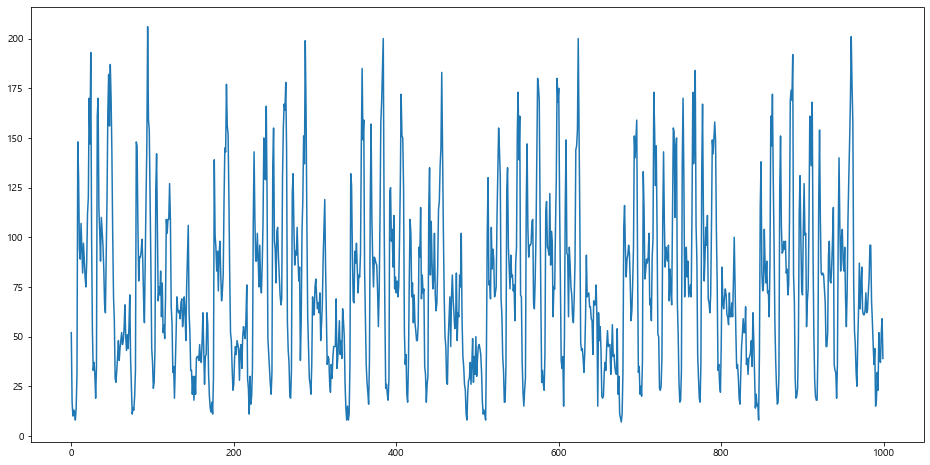

In [10]:
plt.figure(figsize=(16,8))
plt.plot(taxi['count'][:1000])

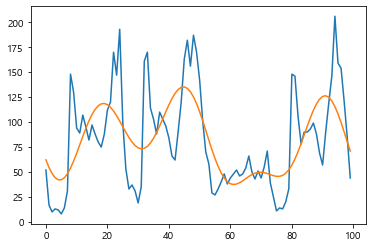

In [26]:
sp = np.fft.fft(taxi['count'][:100])
csp = np.copy(sp)
csp[5:-5]=0
iffted_taxi_cnt = np.fft.ifft(csp)

plt.plot(taxi['count'][:100])
plt.plot(iffted_taxi_cnt)
plt.show()

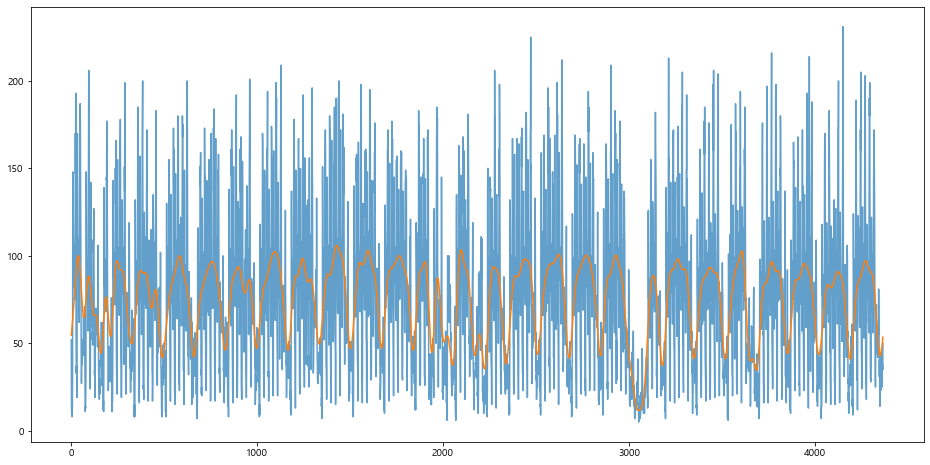

In [40]:
sp = np.fft.fft(taxi['count'])
csp = np.copy(sp)
csp[100:-50]=0
iffted_taxi_cnt = np.fft.ifft(csp)

plt.figure(figsize=(16,8))
plt.plot(taxi['count'],alpha=0.7)
plt.plot(iffted_taxi_cnt)
plt.show()

In [6]:
365*24

8760

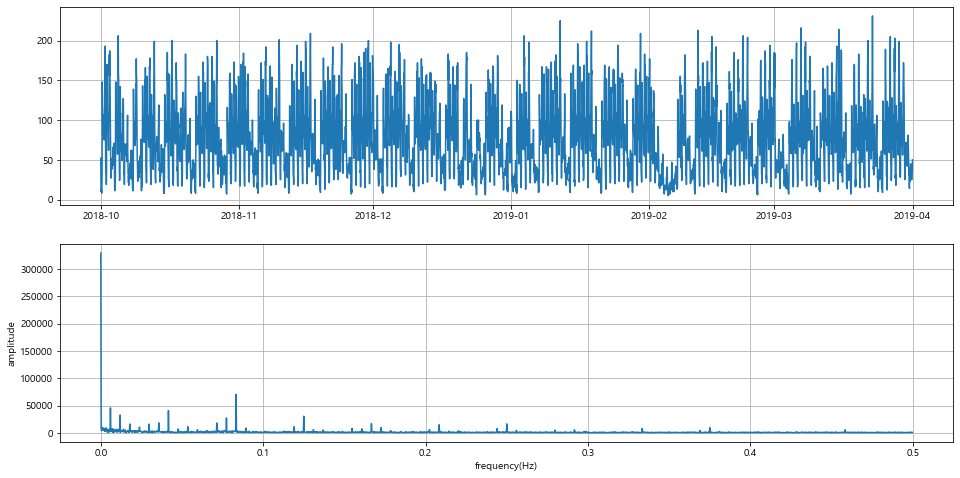

In [93]:
signal = taxi['count'].values  ##승차 건수
fourier = np.abs(np.fft.fft(signal)) ### fft 수행 
n = signal.size 
freq = np.fft.fftfreq(n) ### 주파수 시퀀스

plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.plot(taxi['count'])
plt.grid()
plt.subplot(2,1,2)
plt.plot(freq[:int(n/2)], fourier[:int(n/2)])
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude')
#plt.xlim(0,0.1)
plt.grid()
plt.show()

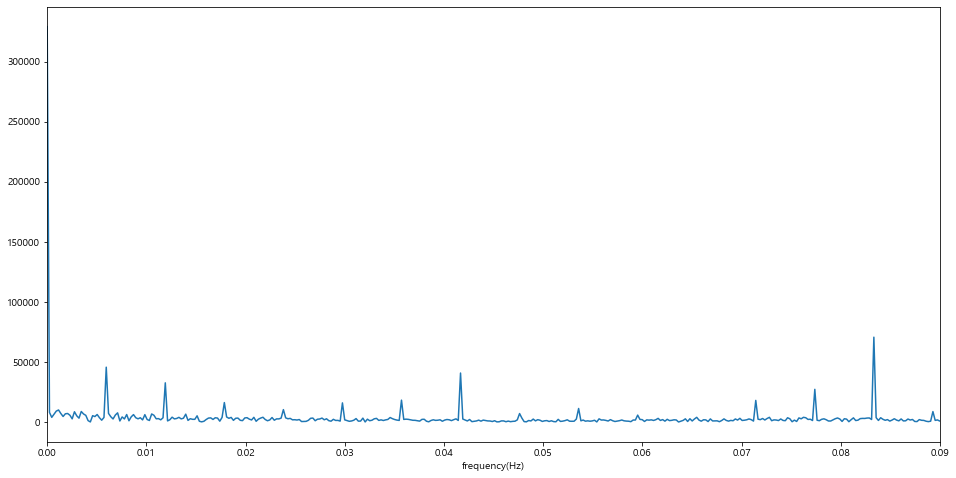

In [98]:
plt.figure(figsize=(16,8))
plt.grid()
plt.plot(freq[:int(n/2)], fourier[:int(n/2)])
plt.xlabel('frequency(Hz)')
plt.xlim(0,0.09)
plt.grid()
plt.show()

주기 = 1/주파수

In [5]:
54/24

2.25

In [4]:
4368*0.0125

54.6

In [115]:
1/0.125

8.0

In [91]:
freq

array([ 0.        ,  0.00022894,  0.00045788, ..., -0.00068681,
       -0.00045788, -0.00022894])

In [92]:
fourier

array([328979.        ,   8026.14391657,   3902.01006628, ...,
         6555.6621572 ,   3902.01006628,   8026.14391657])

In [106]:
dic = dict(zip(freq,fourier))
dic

{0.0: 328979.0,
 0.00022893772893772894: 8026.14391656723,
 0.0004578754578754579: 3902.01006627959,
 0.0006868131868131868: 6555.662157196832,
 0.0009157509157509158: 9112.870869314498,
 0.0011446886446886447: 10039.101024487609,
 0.0013736263736263735: 7119.12665996171,
 0.0016025641025641025: 4642.430718773384,
 0.0018315018315018315: 6878.167935661625,
 0.0020604395604395605: 7111.717114917252,
 0.0022893772893772895: 5662.147917352361,
 0.0025183150183150185: 2668.548657934395,
 0.002747252747252747: 8565.063351148787,
 0.002976190476190476: 5225.7612752775285,
 0.003205128205128205: 3233.3594171195414,
 0.003434065934065934: 8781.861505142751,
 0.003663003663003663: 6725.574342337701,
 0.003891941391941392: 5570.400441902642,
 0.004120879120879121: 1208.2556341161464,
 0.00434981684981685: 107.70817452093436,
 0.004578754578754579: 5294.286585994913,
 0.004807692307692308: 4579.851249796109,
 0.005036630036630037: 6276.325299729331,
 0.005265567765567766: 3607.1887581516057,
 0.0

In [109]:
val_reverse = sorted(dic.items(),reverse=True,key=lambda item: item[1])
val_reverse

[(0.0, 328979.0),
 (0.08333333333333333, 70618.08418216274),
 (-0.08333333333333333, 70618.08418216274),
 (0.005952380952380952, 45652.316448988044),
 (-0.005952380952380952, 45652.316448988044),
 (0.041666666666666664, 40794.22559005975),
 (-0.041666666666666664, 40794.22559005975),
 (0.011904761904761904, 32632.82488914995),
 (-0.011904761904761904, 32632.82488914995),
 (0.125, 30483.226517010753),
 (-0.125, 30483.226517010753),
 (0.07738095238095238, 27218.790387397796),
 (-0.07738095238095238, 27218.790387397796),
 (0.03571428571428571, 18231.952390463284),
 (-0.03571428571428571, 18231.952390463284),
 (-0.07142857142857142, 18012.338045456563),
 (0.07142857142857142, 18012.33804545656),
 (0.16666666666666666, 16636.25489706142),
 (-0.16666666666666666, 16636.25489706142),
 (0.25, 16363.934398548536),
 (-0.25, 16363.934398548534),
 (-0.017857142857142856, 16209.631978378402),
 (0.017857142857142856, 16209.6319783784),
 (0.02976190476190476, 15948.236591015424),
 (-0.029761904761904

In [117]:
fourier[61]

6562.0226420309

In [94]:
## fourier[60]과 fourier[120]의 값을 제외하고 모두 0으로 변경
fourier[:60] = 0
fourier[61:120] = 0
fourier[121:] = 0

## inverse fourier transform 
denoise = np.fft.ifft(fourier)

plt.figure(figsize=(12, 10))
plt.subplot(2,1,1)
plt.plot(df.index, denoise)
plt.grid()
plt.subplot(2,1,2)
plt.plot(freq[:int(n/2)], fourier[:int(n/2)])
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude')
plt.grid()
plt.show()

24.390243902439025